# Klasifikasi Gambar Sensor EWS Trafo Menggunakan Metode CNN

## Alfendio Alif Faudisyah - FTI UKSW

# Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Build and Recognize Dataset

## Dataset Standardization

In [2]:
# 256 X 256 to 180 X 180
img_height = 180
img_width = 180
batch_size = 32 

## Build Dataset

In [4]:
training_ds = keras.preprocessing.image_dataset_from_directory('C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_3/Training', 
            image_size=(img_height, img_width), batch_size=batch_size)
validation_ds = keras.preprocessing.image_dataset_from_directory('C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_3/Validation', 
            image_size=(img_height, img_width), batch_size=batch_size)
testing_ds = keras.preprocessing.image_dataset_from_directory('C:/Users/alfen/OneDrive/Pictures/Dataset Sensor EWS Trafo_3/Testing',
            image_size=(img_height, img_width), batch_size=batch_size)

Found 5244 files belonging to 6 classes.
Found 684 files belonging to 6 classes.
Found 1482 files belonging to 6 classes.


## Find Class Names

In [5]:
class_names = training_ds.class_names
print("Training dataset: ",class_names)

class_names = validation_ds.class_names
print("Validation dataset: ",class_names)

class_names = testing_ds.class_names
print("Testing dataset: ",class_names)

Training dataset:  ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']
Validation dataset:  ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']
Testing dataset:  ['CT PZEM 044t', 'LM 35', 'MQ 4', 'MQ 8', 'PZEM 044t', 'Thermocouple Type K']


## Dataset Visualization

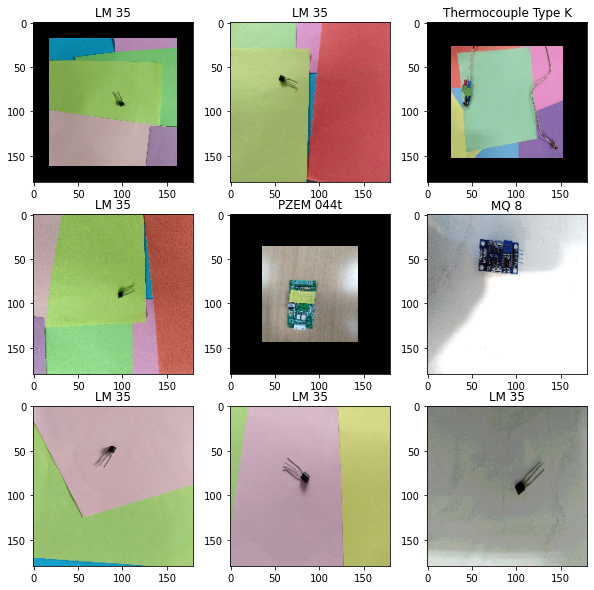

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) # convert bentuk image vektor RGB ke uint8
        plt.title(class_names[labels[i]])

# CT Sensor
# PZEM Sensor
# Thermocouple Type K Driver (ijo ijo max6675) Sensor yang Panjang
# MQ 4 cuma modul karena sensornya mirip dengan MQ8
# MQ 8 cuma modul karena sensornya mirip dengan MQ4
# LM 35 Sensor

## Tuning

In [7]:
# Tune dataset 
# Membuat data ada di memori
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build Classification Model

## Create CNN Model

In [8]:
# Class target < - 6 class
num_classes = 6

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # rescaling menjadi greyscale
    layers.Conv2D(16, 3, padding='same', activation='relu'), # membuat convolutional layer 2D
    layers.MaxPooling2D(), # membuat max pooling layer 2D -> menyimpan feature yang akan kita simpan, menyimpan pooling dari conv 2D
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # dropout layer -> menghilangkan neuron yang tidak terlalu penting, mengurangi overfitting
    layers.Flatten(), # flatten layer -> mengubah bentuk 2D menjadi array 1D
    layers.Dense(128, activation='relu'), # mencari hubungan dari maxpoling 2D yang didapatkan, flatten
    layers.Dense(num_classes) # output layer
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [10]:
# Compile Model CNN
# Compile model untuk melakukan training
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Train Model

In [11]:
# Train Model 
epochs = 15

# Simpan dalam history
history = model.fit( 
    training_ds,
    validation_data=validation_ds,
    epochs=epochs
)

Epoch 1/15
164/164 [==============================] - 241s 1s/step - loss: 1.2000 - accuracy: 0.5402 - val_loss: 1.0858 - val_accuracy: 0.5687
Epoch 2/15
164/164 [==============================] - 239s 1s/step - loss: 0.4247 - accuracy: 0.8511 - val_loss: 0.7385 - val_accuracy: 0.7339
Epoch 3/15
164/164 [==============================] - 197s 1s/step - loss: 0.2028 - accuracy: 0.9315 - val_loss: 0.6571 - val_accuracy: 0.7836
Epoch 4/15
164/164 [==============================] - 195s 1s/step - loss: 0.1087 - accuracy: 0.9626 - val_loss: 0.8925 - val_accuracy: 0.7471
Epoch 5/15
164/164 [==============================] - 197s 1s/step - loss: 0.0856 - accuracy: 0.9716 - val_loss: 0.8594 - val_accuracy: 0.8012
Epoch 6/15
164/164 [==============================] - 183s 1s/step - loss: 0.0632 - accuracy: 0.9792 - val_loss: 1.2919 - val_accuracy: 0.7149
Epoch 7/15
164/164 [==============================] - 182s 1s/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.9024 - val_accuracy: 0.7895

## Training Visualization

Text(0.5, 1.0, 'Training and Validation Loss')

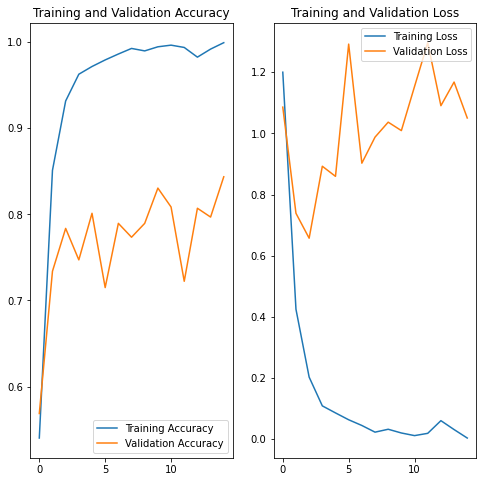

In [12]:
# Visualisasi Training Akurasi 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Visualisasi Training Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs 
epochs_range = range(epochs)
plt.figure(figsize=(8, 8)) # Tampilan dalam figure

plt.subplot(1, 2, 1) # Tampilan sisi per sisi
plt.plot(epochs_range, acc, label='Training Accuracy') # Plot akurasi training
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot akurasi validasi
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') # Plot loss training
plt.plot(epochs_range, val_loss, label='Validation Loss') # Plot loss validasi
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Testing Model

## Testing Accuracy

In [13]:
test_loss, test_acc = model.evaluate(testing_ds, verbose=2)
print('\nTest accuracy:', test_acc)

47/47 - 56s - loss: 1.4652 - accuracy: 0.7564 - 56s/epoch - 1s/step

Test accuracy: 0.7564102411270142


## Testing Visualization

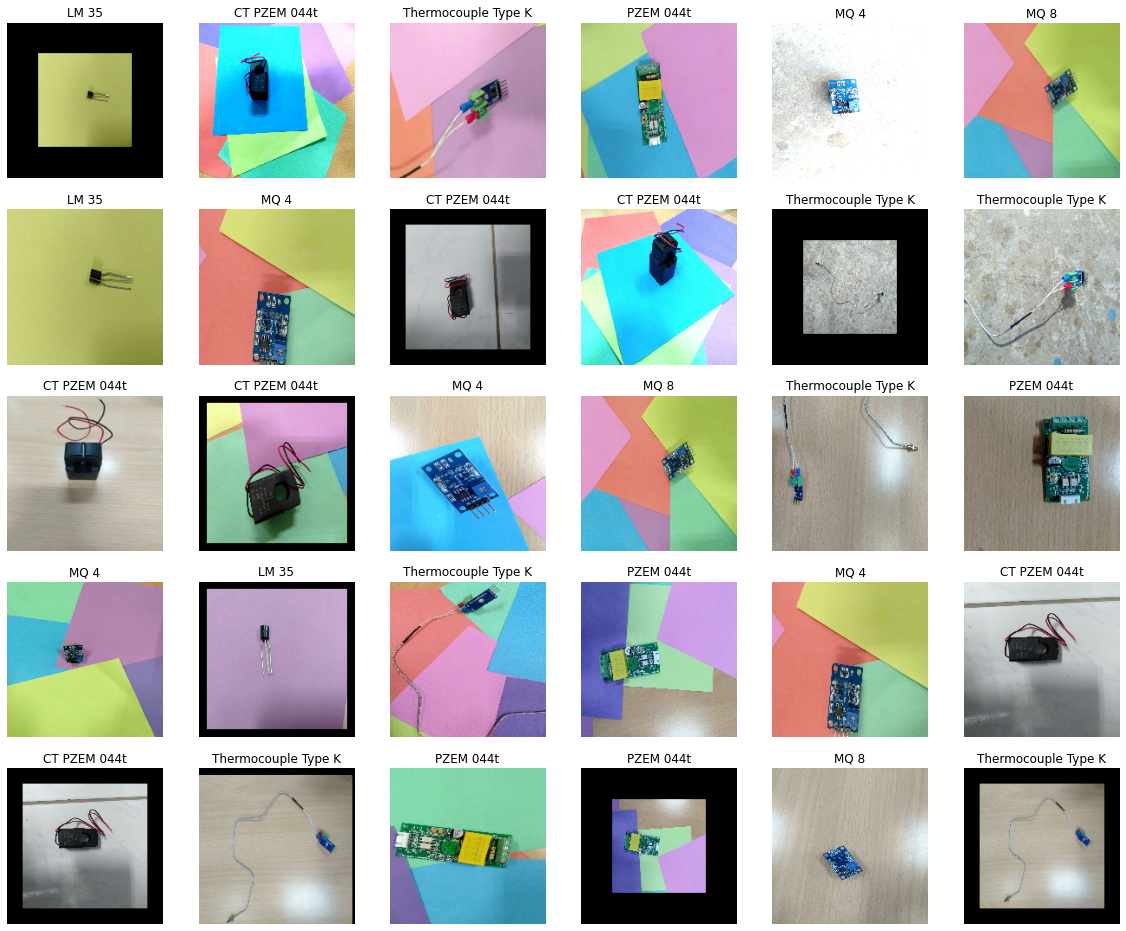

In [20]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(1):
    for i in range(30):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Testing Prediction

In [22]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(testing_ds)
print(predictions[0])
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

47/47 [==============================] - 47s 879ms/step
[1.0000000e+00 1.0871277e-13 4.4193572e-19 2.4515107e-10 3.4045685e-12
 9.2476721e-17]
0
CT PZEM 044t


# Confidence Score

## Ambil 1 gambar di internet

In [23]:
test_url = "https://static-01.daraz.pk/p/e44b816c6cddd662218fe8a6ab226594.jpg"
test_path = tf.keras.utils.get_file('', origin=test_url)

img = keras.preprocessing.image.load_img(test_path, target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])

print("Gambar ini adalah {} dengan akurasi {:.2f}%.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 1s 1s/step
Gambar ini adalah CT PZEM 044t dengan akurasi 100.00%.


# Save the model

In [24]:
model.save ("Save model/model_percobaan_8")

INFO:tensorflow:Assets written to: Save model/model_percobaan_8\assets


INFO:tensorflow:Assets written to: Save model/model_percobaan_8\assets


In [25]:
model.save ("Save model/model_percobaan_8.h5")